# Performance ar models

In [1]:
path = '/home/hanna/lagrings/results/ar/'

In [2]:
import glob
import os

import matplotlib.pyplot as plt 
import xarray as xr 

In [10]:
files = glob.glob(path+'*AR*-o1*')

In [11]:
len(files), min(files), max(files)

(116,
 '/home/hanna/lagrings/results/ar/performance_AR-3-o1_0.0_30.0.nc',
 '/home/hanna/lagrings/results/ar/weights_AR-T-3-o1_1.0_30.25.nc')

In [4]:
#base = '/home/hanna/lagrings/results/stats/2014-01-01_2018-12-31/'
example = glob.glob(path+'/performance*AR*o3*')
data = xr.open_mfdataset(example, combine = 'by_coords') 

In [5]:
data # pass på at mse ikke legges inn om 

<xarray.Dataset>
Dimensions:               (latitude: 2, longitude: 33)
Coordinates:
  * latitude              (latitude) float64 30.0 30.25
  * longitude             (longitude) float64 -15.0 -14.75 -14.5 ... 0.75 1.0
Data variables:
    mse_test              (longitude, latitude) float64 0.06019 nan ... 0.03182
    mse_train             (longitude, latitude) float64 0.06271 nan ... 0.03229
    mae_test              (longitude, latitude) float64 0.06019 nan ... 0.03182
    mae_train             (longitude, latitude) float64 0.06271 nan ... 0.03229
    num_test_samples      (longitude, latitude) float64 4.357e+04 ... 4.36e+04
    num_train_samples     (longitude, latitude) float64 8.392e+04 ... 8.395e+04
    transform             (longitude, latitude) float64 0.0 nan 0.0 ... 0.0 0.0
    sigmoid               (longitude, latitude) float64 0.0 nan 0.0 ... 1.0 1.0
    order                 (longitude, latitude) float64 5.0 nan 5.0 ... 3.0 3.0
    start                 (longitude, latitude) object '2004' nan ... '2004'
    stop                  (longitude, latitude) object '2013' nan ... '2013'
    test_start            (longitude, latitude) object '2014' nan ... '2014'
    test_stop             (longitude, latitude) object '2018' nan ... '2018'
    bias                  (longitude, latitude) float64 0.0 nan 0.0 ... 0.0 0.0
    type                  (longitude, latitude) object 'AR' nan ... 'AR' 'AR'
    time_elapsed_seconds  (longitude, latitude) float64 -0.0004031 ... 0.009785

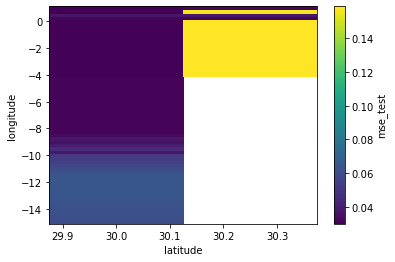

In [6]:
data['mse_test'].plot()

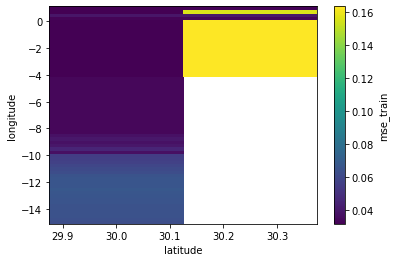

In [7]:
data['mse_train'].plot()

Liste Hugo:
1. En AR model tar ca. et hundre delsekund etter jeg har reorganisert filene mine. Til å inneholde all dataen for en pixel, så ser ut som vi kan friskmelde den .. Fikke kjørt 161/4 pixler i går. Bare for sikkerhetskyld så har jeg lagt det opp sånn at når jeg først har lastet inn dataen tester den fra lag 0 til lag max. Da kan jeg lett sammenligne de første pixlene som kjører ferdig å gjøre meg noen tanker rundt dette. Testet det uten transformasjon og sigmoid -- det blir prosjektet for helga. 

2. Liste over performance metrics vi skal evaluere metodene på [mse, r2, mae (lettere å tolke enn mse, ), ]
    * Hvordan får jeg mse ti å være sammenlignbar over flere dimensjoner. 
    * Kan jeg ha config og resultater i sammme tabell -- spesielt den på convlstm blir litt rar hvis ikke. 
3. Hva er egentlig mine objectives jeg skal svare på i diskusjonen og kan vi ta en titt på abstract. 

4. Hvordan diskutere datasettet og hvor lang bør en diskusjon være ..?

5. Hvor mye oppramsing kan man ha i Future work?
    * sesong og tid på dagen 

** Siri hun hadde prediktere til et tidspunkt, informasjon 24 timer tilbake i tid.
Får man noe mer informasjonp for tidspunktet 24 timspunkt.

Plot korrelasjon mellom skyer og 24 t 
Autokorrelasjon, Test det for pixels. 

AR modeller som predikerer 6 tidspunkt frem. Da trenger du 

6 modeller, en for å tidspunkt 1 og 2, osv opp til 6.


Objective (når man beveger seg inn i ukjent terreng), 
1. Main objective høy kvalitets dataset for å kunne gjøre klimaprojeksjoner. 
2. Modellere AR og Evalurer
3. Modellere en LSTM og Evaluere


En måte å se på det på, hvor god er kombinasjonen av dataset og modeller. Er feilen så liten at det har en nytte effekt eller er feilen så stor at det ikke har noe praktisk nytte verdi. Da ligger nok feilen i datasettet. Det er ikke så mye å hente på modell siden om jeg har gjort det slik jeg burde.

Det ville overaske hugo om noen modeller som predikerer dette bedre basert på samme dataset. Det er ikke sikker det finnes data som er tilstrekkelig høy kvalitet grunnlags data datasettet kan bygges på.

Etter min mening er dette så bra dataset man får etter min mening, men idealt sett skule kanskje skyene også være integrert i noe reanalyse. 

For de dataene som finner idag får vi det, kan nok få bedre resultater av mer avanserte preprosseser.

Dataset future work
1. artefact -
2. hjørner -
3. nans -
  * 
  
I dataset. 
OBS pass på alternative dataset og styrker og svakheter på disse og hvorfor du gjorde det på denne måten. 
Tabell hvor du oppsummerer dem.

Skriv modellene i tekst og i tabell. 

Liste med spørsmål til Trude:
1. Kan jeg si kvaliten på datasetter er høy? Det er generelt vanskelig med skyer siden 

# Status AR Data 

In [13]:
files = glob.glob('/home/hanna/lagrings/ar_data/*')

In [15]:
min(files), max(files), len(files)

('/home/hanna/lagrings/ar_data/all_vars_lat_lon_30.0_-0.25.nc',
 '/home/hanna/lagrings/ar_data/all_vars_lat_lon_30.25_9.75.nc',
 299)

In [19]:
files[0], files[-1]

('/home/hanna/lagrings/ar_data/all_vars_lat_lon_30.0_-15.0.nc',
 '/home/hanna/lagrings/ar_data/all_vars_lat_lon_30.25_19.25.nc')

# Thoughts: If num regression models prepared is not the same as num ar_data files, you can generage more results. 